In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# custom packages
from ratsimulator import Agent
from ratsimulator.Environment import Rectangle

import sys
sys.path.append("../../src") if "../../src" not in sys.path else None # avoid adding multiple relave paths to sys.path

from Brain import Brain
from methods import *

In [3]:
boxsize=(2.2, 2.2)
origo=(0,0)
soft_boundary=0.2

In [4]:
env = Rectangle(boxsize=boxsize, soft_boundary=soft_boundary)
npcs=4096
sigma=0.12
brain = Brain(env, npcs, sigma, DoG=True)
board = env.get_board(res=(100,100))
# avoid_walls = env.avoid_walls
# env.add_wall(name="free_wall1", bias=np.array([0.401,0.403]),slope=np.array([0.8,0.8]),t=[0,1])

Singular matrix
Singular matrix


# Single cell response

torch.Size([100, 100, 4096])


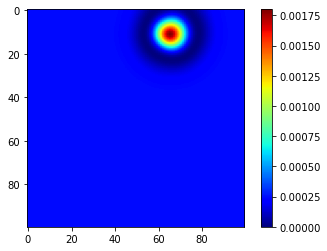

In [5]:
# VECTORIZED and succinct brain response calculations
br = brain.softmax_response(torch.tensor(board, dtype=torch.float32))
print(br.shape)
plt.imshow(br[...,5], cmap='jet')
plt.colorbar()

In [6]:
entropy = lambda x: torch.mean(torch.sum(-torch.nan_to_num(x * torch.log(x)), axis=-1))
print(f"{entropy(br)=}")

entropy(br)=tensor(8.2249)


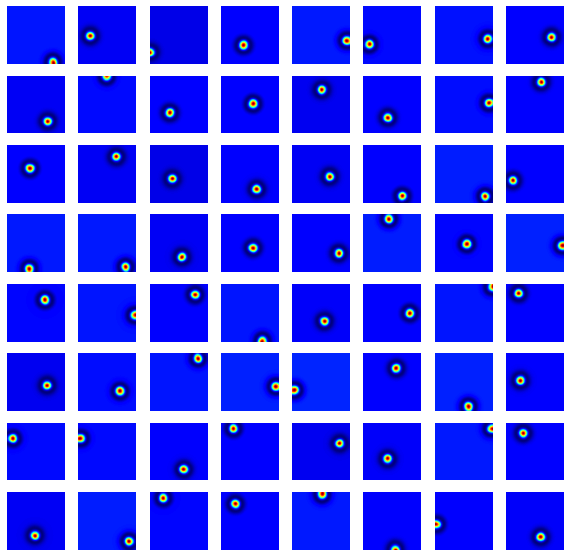

In [7]:
idxs=slice(0, 64, 1)
fig, ax = multiimshow(br[...,idxs].T)

# Decoding error going from place-cell basis to Euclidean basis

torch.Size([100, 100, 4096])


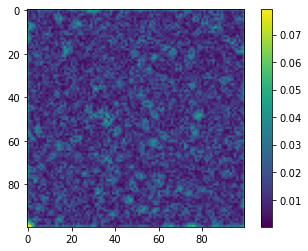

In [8]:
print(br.shape)
diff = torch.sqrt(torch.sum((brain.to_euclid(br,k=3) - board)**2,axis=-1))
plt.imshow(diff)
plt.colorbar()

# Sorschers place-cell activity

Activity = 0.0002148717612726614, in middle of the board for cell_nr = 10


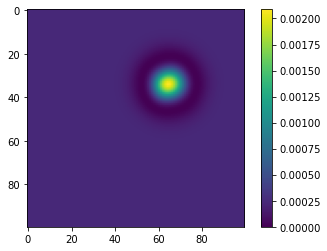

In [9]:
cell_nr = 10
br = brain.softmax_response(torch.tensor(board,dtype=torch.float32))
plt.imshow(br[...,cell_nr])
plt.colorbar()
print("Activity = {}, in middle of the board for cell_nr = {}".format(br[int(board.shape[0]/2),int(board.shape[1]/2),cell_nr],cell_nr))

# Non-vectorized plotting (Sanity check)

In [10]:
board = env.get_board()
exmp_pc = brain.pcs[0]
Z = np.zeros(board.shape[:-1])
for i in range(board.shape[0]):
    for j in range(board.shape[1]):
        #print(board[i,j],exmp_pc)
        d = brain.d_pcc(board[i,j],exmp_pc)
        tmp = brain.ricker_response(d) # or norm_response
        #print(tmp)
        Z[i,j] = tmp

plt.imshow(Z)
plt.colorbar()

AttributeError: 'Brain' object has no attribute 'd_pcc'

In [ ]:
ncols,nrows = 5,2
fig,axs=plt.subplots(ncols=ncols,nrows=nrows)

for cols in range(ncols):
    for rows in range(nrows):
        Z = np.zeros(board.shape[:-1])
        for i in range(board.shape[0]):
            for j in range(board.shape[1]):
                tmp = brain.d_pcc(board[i,j],brain.pcs[cols*nrows+rows])
                tmp = brain.ricker_response(tmp)
                Z[i,j] = tmp
            
        
        axs[rows,cols].imshow(Z)
        
plt.tight_layout()